# How-to Gaia Data By Dr Priya Hasan

Gaia (DR3) Tutorial and Assignment
Intro to Astronomy 2022, Week 3
Originally written by Sarah Blunt, 2018 and modified by Aldo Panfichi, 2020. Updated by Chetan Chawla, 2021. Updated by Priya Hasan, 2022, 2023

In this tutorial, you will:
learn about star clusters
learn about the Gaia DR3 Database and basic queries
learn about the Astronomical Data Query Language (ADQL)
use the Gaia DR3 Database to get Gaia parameters for the 10,000 closest stars
plot a color-magnitude diagram

# Star Clusters
Globular Clusters
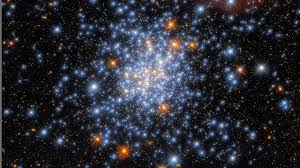
Open Clusters
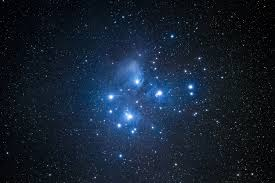






# 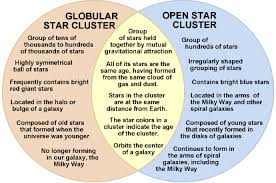

# What is Gaia?

# 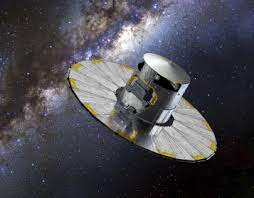
Gaia is a space observatory of the European Space Agency, launched in 2013 and expected to operate until 2025. The spacecraft is designed for astrometry: measuring the positions, distances and motions of stars with unprecedented precision.
Gaia  provides astrometry, photometry, and spectroscopy of more than 1000 million stars in the Milky Way. Also data for significant samples of extragalactic and Solar system objects is made available. The Gaia Archive contains deduced positions, parallaxes, proper motions, radial velocities, and brightnesses. Complementary information on multiplicity, photometric variability, and astrophysical parameters is provided for a large fraction of sources.


### 1.2. Gaia Data

Gaia Data primarily contains of - Right Ascension (RA), Declination (Dec), Parallax, Radial Velocity (RV), Proper Motion in terms of Right Ascension (pmra), and Proper Motion in terms of Declination (pmdec).

1. ✅ **Right Ascension and Declination**- They are the longitude and latitude to position an object in the celestial frame of reference, or they are the celestial coordinates. They are calculated as positions in the plane of the sky. Read more about them at [https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/](https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/).
[(Image Source)](https://en.wikipedia.org/wiki/Right_ascension)

<img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Ra_and_dec_demo_animation_small.gif" alt="RA Dec" style="width: 35%; float:center;"/> 

2. ✅ **Parallax**- The effect which causes an apparent shift in the position of an object with request to a background when observed from two different points (separated by a distance called basis) It is calculated as the semi-angle of inclination of these two different line of sights from the observation points to the object. Image source and more at: [https://en.wikipedia.org/wiki/Parallax](https://en.wikipedia.org/wiki/Parallax) 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Stellarparallax2.svg/340px-Stellarparallax2.svg.png" alt="Parallax" style="width: 15%; float:center;"/>

3. ✅ **Radial Velocity**- It is the velocity of an object in a direction away from or towards the Earth (observation point). In a more general sense, it is the velocity between the object and the observation point in the direction of the radius connecting the point and the object

4. ✅ **Proper Motions (RA and Dec)**- Proper Motion is the rate of angular drift in the plane of the sky or in a transverse direction. In other words, pmra and pmdec are the rates of change of the RA and Dec of an object in the sky respectively. Their resultant is also called the transverse velocity or total proper motion. The space velocity of an object is the resultant of the transverse velocity and the radial velocity

#### 1.2.1. Gaia Data Releases

Gaia data is made publicly available through periodic data releases (DRs). Each Data Release has a richer data than the previous data release as Gaia covers the stars more times and adds new stars and objects as well. We had two full releases (DR1 and DR2)  until now, and an Early Data Release 3 (EDR3) is the latest update. We will be working with the most recent full release, DR2. You can also try working with EDR3 with almost negligible changes to the queries we use here.


#### 1.2.2. Gaia Archive

Gaia Archive is a remote server which hosts the publicly available Dsta Releases of Gaia in the form of a database. It also provides us an interface to query the data and manipulate it according to our needs on the server itself, without us having the need to download the data first on our local computers. Using the Gaia archive site, we can get data on the positions, brightnesses, distances, and more for millions of stars and do various kinds of science and data visualization from them.

**The Gaia archive can be found here: https://gea.esac.esa.int/archive/**



# Basic Search
Task: We will use the Basic Search in Gaia Archive to get data of a cluster M45 (Pleiades,  Seven Sisters) in 20 arcminutes radius circle around  it.  We will then read this data in Python and plot the required data.
Steps for Basic Search:

Make sure you're on the Basic query page
In the "Name" field, type in "Messier 45". It should resolve the name. 
To the right, put a "20" and then change the unit from "arc sec" to "arc min". This will tell the archive to search in a radius of 20 arcminutes around M45. There are 60 arcseconds in an arcminute, and 60 arcminutes in a degree.
At the bottom, change "Max. number of results" to 5000. 
Make sure that the "Search In" drop down says "gaiadr3.gaia_source". This specifies the data we want to use is frrom source of Gaia DR2
Click "Submit Query"
You'll see a table pop up with the first 20 results from the query. At the bottom, change "VOTable" to "csv" and click "Download results". This will download a csv to your computer with the queried data in it.

In [2]:
%%html
<div style="text-align:center;">
<iframe src="https://gea.esac.esa.int/archive/" width="960" height="540"></iframe>
</div>

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [5]:
!pip install astroquery

You should consider upgrading via the '/Users/priya/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [6]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


In [7]:
## making a GAIA cone_search of 20m radius around M45 center

coordinate = coord.SkyCoord.from_name('M45')
print(coordinate)
radius = u.Quantity(1, u.deg)/3
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius, table_name ="gaiadr3.gaia_source")
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (56.601, 24.114)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [8]:
type(r)

astropy.table.table.Table

In [9]:
r

solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,fl

In [10]:
#Now we can read the csv file into a pandas dataframe

m45 = pd.read_csv('m45.csv') # I renamed my csv file to 'm5.csv' and put it in the the subfolder 'data'

#Checking the top few rows of the data and the number of rows and columns
print("(Rows, Columns) =", m45.shape)
m45.head()

(Rows, Columns) = (2000, 11)


,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error
0,66709878719065856,56.946202,24.006479,0.648265,0.321356,9.303183,-3.013365,19.106915,1.869352,NaN,NaN
1,66709878719066112,56.939443,24.009120,2.736783,0.835917,11.813127,-9.264150,20.256937,1.564932,NaN,NaN
2,66709878719066752,56.940071,24.016597,1.157773,0.065585,4.607895,-3.882651,16.557972,1.350164,NaN,NaN
3,66709913078804992,56.922864,24.014981,1.744764,0.305856,-5.778770,-3.385706,18.990620,2.771936,NaN,NaN
4,66709917373682048,56.923808,24.009331,-0.596421,0.595128,0.029927,-0.712863,19.852995,1.062414,NaN,NaN


In [11]:
## save the ASCII table as a pandas dataframe
all_stars = r.to_pandas()
all_stars
type(all_stars)

pandas.core.frame.DataFrame

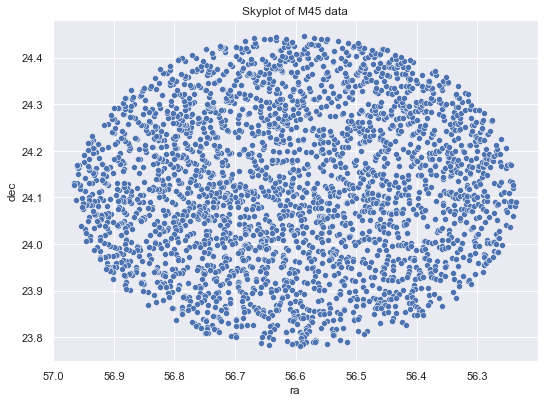

In [12]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', data = all_stars)
#skyplot = sns.scatterplot(x='ra', y='dec', data = members)
skyplot.invert_xaxis()
plt.title('Skyplot of M45 data')
plt.show()

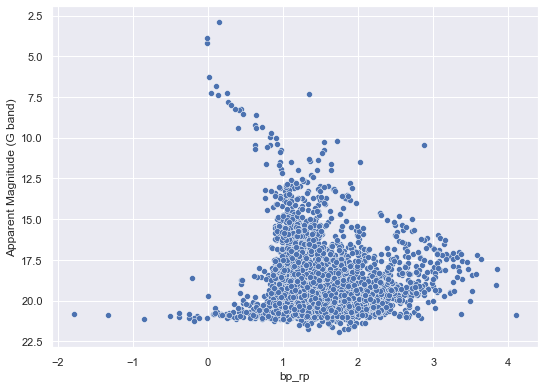

In [13]:
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = all_stars)
plt.ylabel('Apparent Magnitude (G band)')
#plt.xlim(0,3)
#sns.scatterplot(hr.b_v+0.5, hr.V+10)

plt.gca().invert_yaxis()

(-60.0, 30.0)

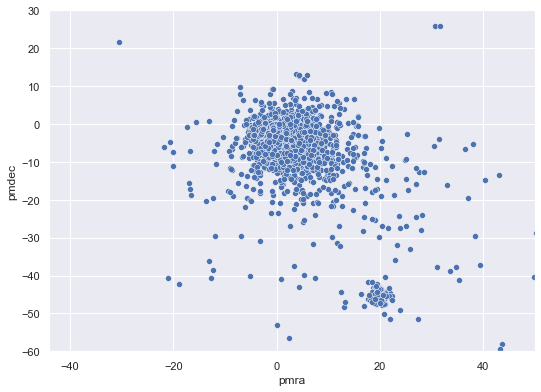

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8.7,6.27)})

#sns.scatterplot(x='pmra', y='pmdec', data=features[features.labels > -1], hue='labels',legend='full')

sns.scatterplot(x='pmra', y='pmdec', data=all_stars)
plt.xlim([-44,50])
plt.ylim([-60,30])

(-6.0, 10.0)

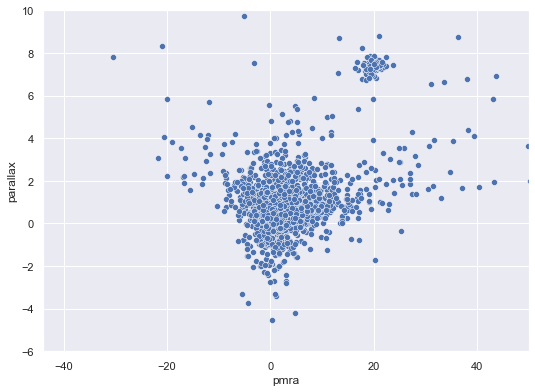

In [15]:
sns.scatterplot(x='pmra', y='parallax', data=all_stars)
plt.xlim([-44,50])
plt.ylim([-6,10])

(-6.0, 10.0)

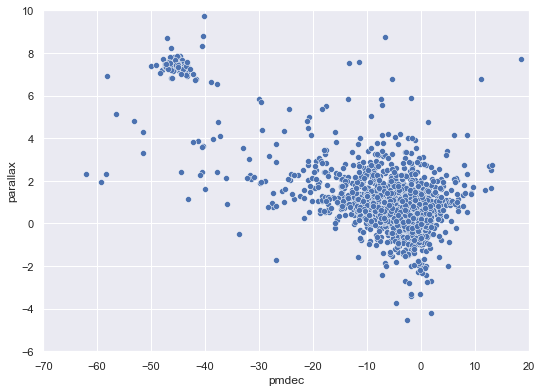

In [16]:
sns.scatterplot(x='pmdec', y='parallax', data=all_stars)
plt.xlim([-70,20])
plt.ylim([-6,10])

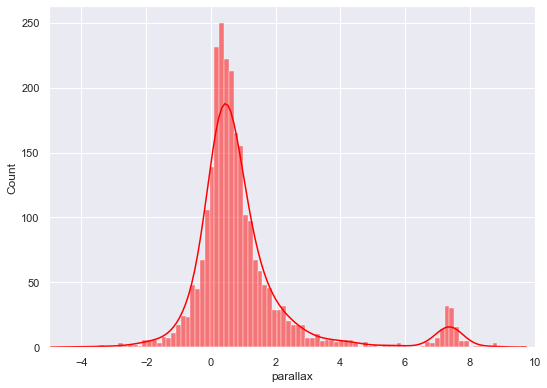

In [17]:
sns.histplot(x='parallax', data=all_stars,
              kde=True,color='red')
#sns.histplot(x='parallax', data=rf_member, label='RF Member',
 #            kde=True,color='Green')
#plt.legend()
plt.xlim([-5,10])
plt.show()

No handles with labels found to put in legend.


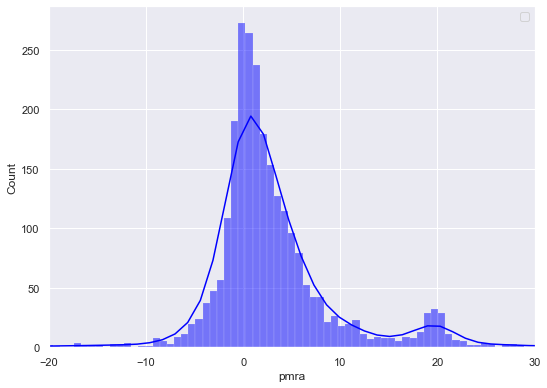

In [18]:
sns.histplot(x='pmra', data=all_stars,
              kde=True,color='blue')
#sns.histplot(x='parallax', data=rf_member, label='RF Member',
 #            kde=True,color='Green')
plt.legend()
plt.xlim([-20,30])
plt.show()

No handles with labels found to put in legend.


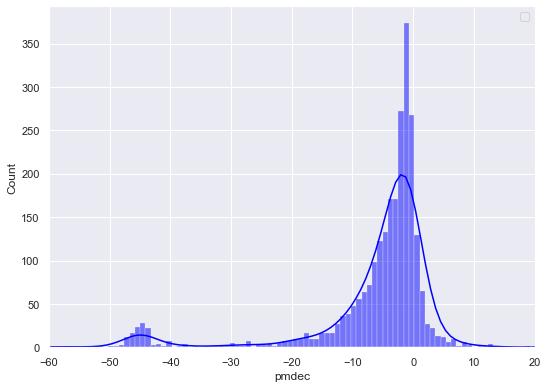

In [19]:
sns.histplot(x='pmdec', data=all_stars,
              kde=True,color='blue')
#sns.histplot(x='parallax', data=rf_member, label='RF Member',
 #            kde=True,color='Green')
plt.xlim([-60,20])
plt.legend()
plt.show()

In [20]:
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,dist
count,2.927000e+03,2.927000e+03,2.927000e+03,2927.0,2927.000000,2927.000000,2927.000000,2927.000000,2553.000000,2553.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,2927.000000
mean,1.636148e+18,6.563266e+16,9.118133e+08,2016.0,56.605572,1.136734,24.122601,0.810931,1.006198,0.448121,...,0.444942,0.406904,0.495982,0.330996,0.302219,0.370290,0.186655,0.170642,0.208247,0.218650
std,0.000000e+00,6.642450e+14,5.304276e+08,0.0,0.182177,3.480475,0.162365,2.423838,1.775541,0.448333,...,0.456021,0.450445,0.458578,0.330808,0.327392,0.332108,0.189694,0.187475,0.190450,0.079226
min,1.636148e+18,6.519193e+16,5.469950e+05,2016.0,56.236885,0.012181,23.781850,0.008992,-8.791216,0.014245,...,0.001200,0.000100,0.003300,0.000900,0.000100,0.002800,0.000500,0.000000,0.001500,0.006338
25%,1.636148e+18,6.521550e+16,4.489656e+08,2016.0,56.456765,0.118823,23.995399,0.085056,0.180700,0.114601,...,0.023550,0.005700,0.061575,0.018100,0.004400,0.048200,0.009800,0.002375,0.026150,0.159612
50%,1.636148e+18,6.523080e+16,9.138771e+08,2016.0,56.610093,0.330569,24.119591,0.235462,0.577512,0.287605,...,0.343000,0.271350,0.417650,0.264050,0.205900,0.329300,0.142700,0.112000,0.178050,0.231972
75%,1.636148e+18,6.671133e+16,1.370203e+09,2016.0,56.750508,0.829884,24.254645,0.582078,1.197278,0.632647,...,0.750450,0.713450,0.794500,0.569650,0.543675,0.605325,0.320075,0.305425,0.338575,0.284190
max,1.636148e+18,6.678503e+16,1.811449e+09,2016.0,56.965469,86.781815,24.446309,53.509377,9.743848,3.483384,...,2.982800,2.963800,2.997800,2.245500,2.229000,2.258300,1.252500,1.243200,1.259600,0.333257


In [21]:
all_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Columns: 153 entries, solution_id to dist
dtypes: Int16(11), bool(12), float32(93), float64(14), int16(17), int64(3), object(3)
memory usage: 1.7+ MB


In [22]:
mask = (all_stars.parallax >= 6) & (all_stars.parallax <= 8.5) &(all_stars.pmra < 30) & (all_stars.pmra > 10)& (all_stars.pmdec > -50) & (all_stars.pmdec < -40)


In [23]:
members = all_stars[mask]

In [24]:
members.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,dist
count,1.080000e+02,1.080000e+02,1.080000e+02,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,108.000000
mean,1.636148e+18,6.567517e+16,1.012635e+09,2016.0,56.630338,0.135999,24.115347,0.095344,7.363813,0.152292,...,0.888030,0.858169,0.915397,0.575871,0.556856,0.593419,0.372002,0.359705,0.383305,0.218307
std,0.000000e+00,6.885208e+14,5.465029e+08,0.0,0.176697,0.193565,0.164836,0.130602,0.232411,0.212373,...,0.521526,0.513763,0.526996,0.318257,0.315020,0.320177,0.212273,0.209187,0.214279,0.076151
min,1.636148e+18,6.519998e+16,4.198555e+06,2016.0,56.277338,0.012181,23.787510,0.008992,6.737442,0.014245,...,0.004600,0.001200,0.012700,0.004000,0.001000,0.010900,0.002200,0.000500,0.006000,0.026672
25%,1.636148e+18,6.521410e+16,5.014678e+08,2016.0,56.475728,0.033905,23.992178,0.024575,7.231722,0.037741,...,0.590075,0.559725,0.640525,0.391825,0.353975,0.435250,0.246500,0.234425,0.258750,0.158461
50%,1.636148e+18,6.522910e+16,1.050352e+09,2016.0,56.638711,0.084352,24.103659,0.063056,7.364441,0.096587,...,0.916750,0.867150,0.936800,0.574200,0.550300,0.590500,0.385350,0.368800,0.391700,0.234661
75%,1.636148e+18,6.671459e+16,1.481213e+09,2016.0,56.789979,0.154463,24.254666,0.107203,7.491463,0.167927,...,1.165175,1.132300,1.217200,0.741775,0.725650,0.767025,0.502800,0.485250,0.525350,0.273122
max,1.636148e+18,6.678245e+16,1.808283e+09,2016.0,56.943379,1.604912,24.433739,1.070261,8.231177,1.701455,...,2.298100,2.261700,2.337300,1.379200,1.350100,1.393100,0.938700,0.919600,0.946700,0.332050


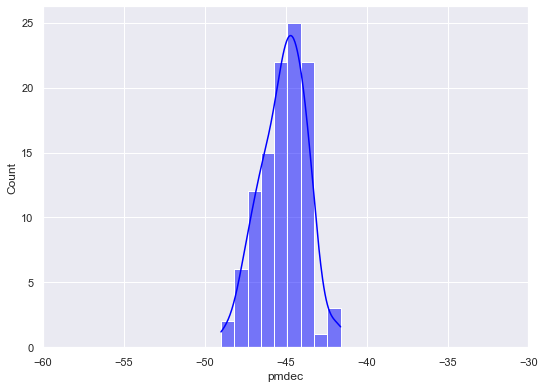

In [25]:
sns.histplot(x='pmdec', data=members,
              kde=True,color='blue')
#sns.histplot(x='parallax', data=rf_member, label='RF Member',
 #            kde=True,color='Green')
plt.xlim([-60,-30])
#plt.legend()
plt.show()

In [26]:
members

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
17,1636148068921376768,Gaia DR3 65226401312036864,65226401312036864,794693112,2016.0,56.630027,0.111463,24.117141,0.093256,7.393074,...,1.6774,1.7501,1.2744,1.2468,1.3041,0.6897,0.6746,0.7061,MARCS,0.026672
22,1636148068921376768,Gaia DR3 65224889481112832,65224889481112832,1268966677,2016.0,56.608796,0.462524,24.085812,0.390092,7.572114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.029067
63,1636148068921376768,Gaia DR3 65229734206151680,65229734206151680,227615435,2016.0,56.605873,0.063788,24.159919,0.049626,7.190575,...,0.8429,0.8651,0.5634,0.5539,0.5687,0.3508,0.3448,0.3540,MARCS,0.046136
97,1636148068921376768,Gaia DR3 65225611037551360,65225611037551360,1097700054,2016.0,56.663990,0.017479,24.102995,0.015164,7.360922,...,0.0028,0.0185,0.0079,0.0024,0.0160,0.0043,0.0013,0.0087,MARCS,0.058531
155,1636148068921376768,Gaia DR3 65224442806459008,65224442806459008,1284141085,2016.0,56.553723,0.014955,24.054171,0.012504,7.332498,...,0.6321,0.6521,0.4642,0.4560,0.4707,0.2512,0.2468,0.2547,MARCS,0.073775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,1636148068921376768,Gaia DR3 65208396808627840,65208396808627840,1782901585,2016.0,56.922764,0.015220,23.971728,0.011432,7.367580,...,0.9793,1.0015,0.7561,0.7487,0.7663,0.4057,0.4016,0.4112,MARCS,0.326469
2877,1636148068921376768,Gaia DR3 65199978672758272,65199978672758272,1729653682,2016.0,56.657097,0.017948,23.787510,0.014423,7.471863,...,0.0059,0.0290,0.0176,0.0048,0.0239,0.0094,0.0025,0.0128,PHOENIX,0.330487
2880,1636148068921376768,Gaia DR3 65275501377570944,65275501377570944,689917450,2016.0,56.277338,0.162854,24.263309,0.123545,6.834920,...,0.1370,0.1576,0.1294,0.1227,0.1413,0.0692,0.0656,0.0756,PHOENIX,0.330860
2887,1636148068921376768,Gaia DR3 66734514652754688,66734514652754688,1560405495,2016.0,56.824750,1.604912,24.375293,1.070261,7.577743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.331504


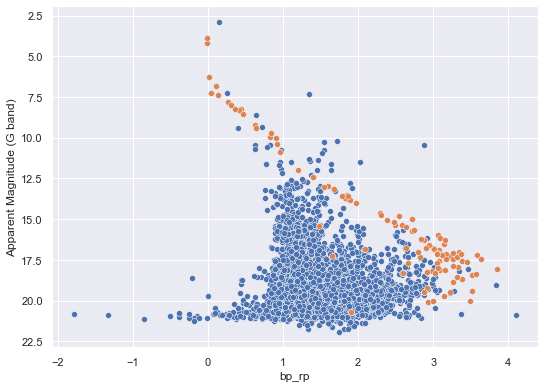

In [27]:

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = all_stars)
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = members)
plt.ylabel('Apparent Magnitude (G band)')
#plt.xlim(0,3)
#sns.scatterplot(hr.b_v+0.5, hr.V+10)

plt.gca().invert_yaxis()

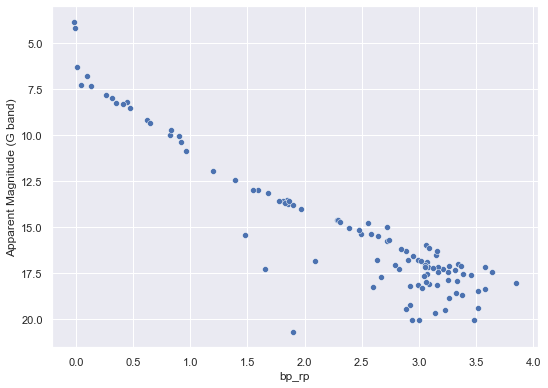

In [28]:
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = members)
plt.ylabel('Apparent Magnitude (G band)')
#plt.xlim(0,3)
#sns.scatterplot(hr.b_v+0.5, hr.V+10)

plt.gca().invert_yaxis()

In [29]:
mask2=(members.parallax_over_error >= 3) & (members.pmra_error < 1) & (members.pmdec_error < 1) & (members.ruwe < 1.4) & (all_stars.parallax >= 6) & (all_stars.parallax <= 9) &(all_stars.pmra < 30) & (all_stars.pmra > 10)& (all_stars.pmdec > -50) & (all_stars.pmdec < -40)


In [30]:
members2 = members[mask2]

<ipython-input-30-3559b98ade00>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  members2 = members[mask2]


In [31]:
members2


,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
22,1636148068921376768,Gaia DR3 65224889481112832,65224889481112832,1268966677,2016.0,56.608796,0.462524,24.085812,0.390092,7.572114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.029067
97,1636148068921376768,Gaia DR3 65225611037551360,65225611037551360,1097700054,2016.0,56.663990,0.017479,24.102995,0.015164,7.360922,...,0.0028,0.0185,0.0079,0.0024,0.0160,0.0043,0.0013,0.0087,MARCS,0.058531
155,1636148068921376768,Gaia DR3 65224442806459008,65224442806459008,1284141085,2016.0,56.553723,0.014955,24.054171,0.012504,7.332498,...,0.6321,0.6521,0.4642,0.4560,0.4707,0.2512,0.2468,0.2547,MARCS,0.073775
187,1636148068921376768,Gaia DR3 65230764996027776,65230764996027776,1204621712,2016.0,56.566777,0.030415,24.189728,0.021397,7.399227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.081920
196,1636148068921376768,Gaia DR3 65223515093523328,65223515093523328,131180461,2016.0,56.597871,0.066721,24.030747,0.060405,7.373005,...,1.0305,1.0694,0.6469,0.6344,0.6586,0.4465,0.4385,0.4541,MARCS,0.083299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,1636148068921376768,Gaia DR3 65282098447322752,65282098447322752,1164646792,2016.0,56.353360,0.052395,24.345770,0.039073,6.975272,...,1.1332,1.1652,0.7289,0.7183,0.7389,0.4813,0.4746,0.4874,MARCS,0.323603
2795,1636148068921376768,Gaia DR3 66735446661374976,66735446661374976,658462074,2016.0,56.782902,0.100975,24.393665,0.068864,7.034788,...,1.3165,1.3930,0.8462,0.8214,0.8699,0.5595,0.5443,0.5739,MARCS,0.325140
2816,1636148068921376768,Gaia DR3 65208396808627840,65208396808627840,1782901585,2016.0,56.922764,0.015220,23.971728,0.011432,7.367580,...,0.9793,1.0015,0.7561,0.7487,0.7663,0.4057,0.4016,0.4112,MARCS,0.326469
2877,1636148068921376768,Gaia DR3 65199978672758272,65199978672758272,1729653682,2016.0,56.657097,0.017948,23.787510,0.014423,7.471863,...,0.0059,0.0290,0.0176,0.0048,0.0239,0.0094,0.0025,0.0128,PHOENIX,0.330487


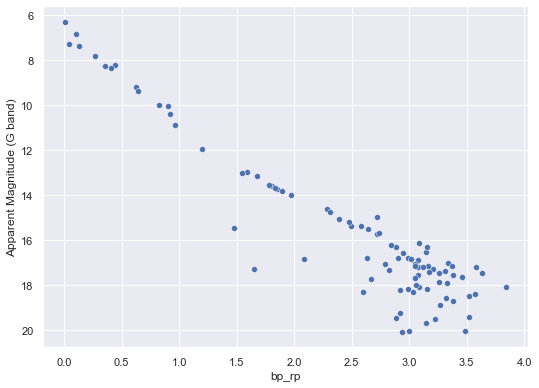

In [32]:
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag',palette='RdYlGn',
                data = members2)
plt.ylabel('Apparent Magnitude (G band)')
#plt.xlim(0,3)
#sns.scatterplot(hr.b_v+0.5, hr.V+10)

plt.gca().invert_yaxis()

# About ADQL
ADQL is a data query language similar to SQL, built for astronomical data purposes. Its syntax is similar enough to SQL if you are familiar with it, though with some differences. In ADQL you write queries to fetch data from the database, here, from the Gaia Archive Database. If you are aware of basic level SQL, you can skip the following details (Marked with ✅)

✅ A query has a specific structure it pertains to, just like a command. It is a compound of mainly these parts (only SELECT and FROM parts are required, others are optional) -

✅ SELECT part- It tells the columns we want to fetch in the query. The columns can be fetched using either column_name directly, or in case of complex queries involving multiple tables, require table_name.column_name to avoid any column name conflicts. We can also use ADQL functions or arithmetics in the SELECT part to manipulate the data before fetching it. If we want to fetch all columns from the table, we can use SELECT * or SELECT table_name.*. We can also set the (maximum) number of rows from the top we want to query using SELECT TOP required_number (Similarly, for bottom rows, we can use the keyword BOTTOM).
✅ FROM part- It tells the table we want to fetch data from. It usually consists the schema name (which is a logical sub-structure of a database) and the table name. For example, for fetching the source data from the Gaia DR2 schema, we will have to use FROM gaiadr2.gaia_source.
✅ WHERE part- It tells the conditions for fetching the data. As in the above example, we used two conditions other than the globular cluster name. These can be written as WHERE gaia_source.parallax>=5 AND gaia_source.parallax_over_error>=20, where AND is a restricted keyword in ADQL used to signify that both these conditions must be met for the queried rows
✅ ORDER BY part- It tells how the data should be Ordered before fetching the data. We can use one or more colums to order the data on and DESC or ASC are used to specify the ordering to be Descending or Ascending respectively. The data is only ordered for the query and no changes are made in the actual data table. If we need the data to be ordered randomly, we need to use ORDER BY random_item, where random_item is a restricted keyword in ADQL.
✅ So, a simple query structure is SELECT <columns> FROM <tables> WHERE <conditions> ORDER BY <columns>

There are more such parts we can add like GROUP BY (to create factor sets/subsets that have identical values for one or more columns, used to compute aggregates), INNER JOIN (to make computations on one or more referenced columns within a table), OUTER JOIN (to make computation based on multiple tables lined by one or more referenced columns), etc. The main distiction between SQL and ADQL is the addition of Geometric extension functions to SQL

💡More resources for learning ADQL are mentioned in the Assignment part below.

# Writing a simple query
We're going to now look at a very simple ADQL query - Let's select the 100 stars closest to Earth (so, with the largest parallaxes) using ADQL. The syntax for this query goes as follows:

We select the top 100 results:

SELECT TOP 100

...and the following columns:

gaia_source.source_id, gaia_source.ra, gaia_source.ra_error, gaia_source.dec, gaia_source.dec_error,
gaia_source.parallax, gaia_source.parallax_error

...from the DR2 Source catalog:

FROM gaiadr2.gaia_source

...where the parallax is greater than 0 (to avoid issues with improperly catalogued parallaxes):

WHERE gaia_source.parallax >= 0

...and the results are in descending order by parallax to get the top 100 entries with maximum parallax:

ORDER BY gaia_source.parallax DESC

Putting the whole query together:

SELECT TOP 100 
gaia_source.source_id, gaia_source.ra, gaia_source.ra_error, gaia_source.dec, gaia_source.dec_error,
gaia_source.parallax, gaia_source.parallax_error
FROM gaiadr2.gaia_source
WHERE gaia_source.parallax >= 0
ORDER BY gaia_source.parallax DESC

# 2.2. Learn More About ADQL

1. Navigate to the Gaia ADQL interface. First, go [here](https://gea.esac.esa.int/archive/). Click "Search," then click "Advanced (ADQL)" (in the top left corner of the page). 

2. Read [this webpage](https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook) (only till *'Ten example ADQL queries'*; you can read the example queries if you want to go a step further!) 

3. Read slides 6-14 in [this powerpoint](https://www.cosmos.esa.int/documents/915837/915858/ADQL_handson_slides.pdf/652b9120-a3fe-4857-b5eb-933b476687ad).

   Try out some of the commands for yourself in the Gaia ADQL search bar you opened in step 1. Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

   Don't worry if you don't understand everything in the powerpoint or the website! Pick out the most important slides/functions and summarize them for yourself. A quick ADQL reference guide can also be used [here](https://www.g-vo.org/pmwiki/uploads/About/adqlref_2016.pdf) 
   
   ** Note: wherever the powerpoint uses "gaiadr1.tgas_source," replace with "gaiadr2.gaia_source."

In [33]:
#Let's take a look at what this data looks like!
closest100 = pd.read_csv('closest_100.csv')
print(closest100.shape)
closest100.head()

(100, 7)


,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error
0,4062964299525805952,272.237829,1.276152,-27.645916,0.830618,1851.882140,1.285094
1,4065202424204492928,274.906872,1.251748,-25.255882,1.571499,1847.433349,1.874937
2,4051942623265668864,276.223193,0.682959,-27.140479,0.500750,1686.265958,1.473535
3,4048978992784308992,273.112421,1.092637,-31.184670,1.362824,1634.283354,1.971231
4,4059168373166457472,259.297177,1.640748,-30.486547,2.069445,1513.989051,2.868580


# Assignment 1
2.1. Notes:
Working with ADQL can be challenging, especially if you don't have experience with SQL or related query languages. If you spend too much time stuck on a task, post about it on Piazza (you can post anonymously if you want). An instructor will help you out! Don't struggle needlessly.
Make sure you complete the pandas and matplotlib tutorials before attempting this assignment.

Use the Gaia DR3 Dataase to Get Gaia Parameters for the 10,000 Closest Stars
Write an ADQL query to get parameters of the 10,000 closest stars. Your query should return the following parameters:
BP - RP color (bp_rp in the Gaia database)
absolute g-band photometric magnitude (you'll need to calculate this one)
distance
RA
Dec
radius
effective temprature
Download your Query Results as a csv file.
Hints:
Distance (in parsecs) is the inverse of parallax (in arcseconds). Keep an eye on units! Gaia by default shows parallaxes in milliarcseconds (mas) .
You can calculate absolute photometric magnitude in the gband using this formula: phot_g_mean_mag + 5 + 5 * log10(parallax/1000). You can alias this value and can use these in conditions, grouping, joins, or ordering the data.
Find the names of the colums for RA, Dec, radius and effective temparature using the database window part in the Advanced (ADQL) tab in 'Search' of the Gaia archive
You'll need to use "ORDER BY" in your ADQL command.
Some Gaia sources have negative parallaxes due to instrumental imperfections. You'll need to add a line to your query specifying that parallax must be greater than 0.
Using the buttons that pop up to the right of your query results, you can download the results or view them in your browser. Hover over the buttons to see what they do.

# Assignment 2: Plot HRD for a few other clusters (NGC 1893, M4, NGC 581) to see the similarities and differences in HRDs. Find the distance to each of these clusters.
